# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/video_games_sales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [33]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
data = pd.read_csv('video_games_sales.csv')
data.head()
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Shooter', 'Role-Playing',
       'Puzzle', 'Misc', 'Party', 'Simulation', 'Action',
       'Action-Adventure', 'Fighting', 'Strategy', 'Adventure', 'Music',
       'MMO', 'Sandbox', 'Visual Novel', 'Board Game', 'Education'],
      dtype=object)

# Cleaning

In [3]:
data = data[['Critic_Score', 'Genre', 'Platform']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  6536 non-null   float64
 1   Genre         55792 non-null  object 
 2   Platform      55792 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


In [5]:
data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6536 entries, 0 to 55653
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  6536 non-null   float64
 1   Genre         6536 non-null   object 
 2   Platform      6536 non-null   object 
dtypes: float64(1), object(2)
memory usage: 204.2+ KB


# Test hypothesis

# 1) Как критики относятся к спортивным играм? 

In [7]:
vals = data[data['Genre'] == 'Sports'].Critic_Score

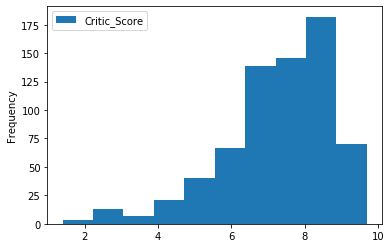

In [8]:
data[data['Genre'] == 'Sports'].plot(kind='hist') 

In [9]:
# H0 = mean critics rating of Sports Games is >= 5
# H1 = mean critics rating of Sports Games is < 5

In [10]:
from scipy import stats as st
alpha = 0.05

result = st.ttest_1samp(vals, 5)

if result.statistic < 0 and result.pvalue / 2 < alpha:
    print('Отвергаем нулевую, критики не любят спортивные')
    
else:
    print('Не отвергаем нулевую, критики любят спортивные')
print(result)

Не отвергаем нулевую, критики любят спортивные
Ttest_1sampResult(statistic=40.864428307278445, pvalue=4.500149759724238e-186)


# 2) Критикам нравятся больше игры на PC или на PS4?  

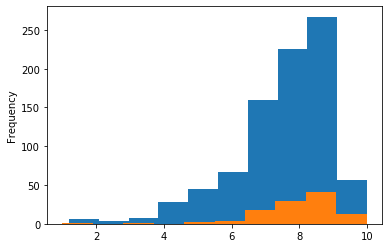

In [11]:
pc_score = data[data['Platform'] == 'PC'].Critic_Score
ps4_score = data[data['Platform'] == 'PS4'].Critic_Score


pc_score.plot(kind='hist')
ps4_score.plot(kind='hist')

# H0 = mean critics rate both alike
# H1 = mean critics prefer one over the other

In [13]:
alpha = 0.05

result = st.ttest_ind(pc_score, ps4_score, equal_var=False)
print(result)
print('Отрицаем нулевую гипотезу, больше нравиться ps4')

Ttest_indResult(statistic=-2.7394476056351627, pvalue=0.006931808250254211)
Отрицаем нулевую гипотезу, больше нравиться ps4


# 3) Критикам больше нравятся стрелялки или стратегии? 

In [14]:
strategy_score = data[data['Genre'] == 'Shooter'].Critic_Score
shooters_score = data[data['Genre'] == 'Strategy'].Critic_Score
data.Genre.value_counts()
# H0 = mean critics rate both alike
# H1 = mean critics prefer one over the other

Action              1024
Role-Playing         857
Shooter              843
Sports               688
Platform             564
Racing               463
Adventure            394
Strategy             369
Misc                 338
Fighting             328
Puzzle               285
Simulation           229
Action-Adventure      99
Music                 25
Party                 15
MMO                   10
Visual Novel           2
Board Game             1
Sandbox                1
Education              1
Name: Genre, dtype: int64

In [15]:
alpha = 0.05

result = st.ttest_ind(strategy_score, shooters_score, equal_var=False)

print(result)
print('Не отвергаем нулевую гипотезу, одинаково (больше любят шутеры, но это статистичски не значимо)')

Ttest_indResult(statistic=-1.6073949711166526, pvalue=0.10838786414223071)
Не отвергаем нулевую гипотезу, одинаково (больше любят шутеры, но это статистичски не значимо)


## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=cname)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [71]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import copy

In [56]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/senya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/senya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
data = pd.read_csv('spam.csv')
uncleaned_data = copy.copy(data)
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
# lower

In [74]:
data.Message = data.Message.apply(lambda x: x.lower())

In [75]:
# words = word_tokenize(msg.lower())

# filtered_words = []
# # Challenge: append non-stop words to filtered_words
# for word in words:
#     if word not in stop_words:
#         filtered_words.append(word)

# print(filtered_words)

In [76]:
# stop words
stopwords_set = set(stopwords.words('english'))
data.Message = data.Message.apply(lambda x: [word for word in word_tokenize(x.lower()) if word not in stopwords_set])

In [77]:
data.head()

,Category,Message
0,ham,"[go, jurong, point, ,, crazy.., available, bug..."
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,ham,"[nah, n't, think, goes, usf, ,, lives, around,..."


In [78]:
stemmer = SnowballStemmer('english')
data.Message = data.Message.apply(lambda x: [stemmer.stem(word) for word in x])


In [79]:
data.Message[0]

['go',
 'jurong',
 'point',
 ',',
 'crazy..',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'got',
 'amor',
 'wat',
 '...']

In [80]:
data.Message = data.Message.apply(lambda x: [word for word in x if word.isalpha()]) 

In [81]:
data.Message[0]

['go',
 'jurong',
 'point',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [82]:
uncleaned_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 786 kB/s eta 0:00:01
     |████████████████████████████████| 113 kB 536 kB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=f96dc0321e539cb464deee97542a99b1e799f6c9993f763255025e9306b67d82
  Stored in directory: /Users/senya/Library/Caches/pip/wheels/83/a6/12/bf3c1a667bde4251be5b7a3368b2d604c9af2105b5c1cb1870
Successfully built smart-open


In [91]:
import gensim 
from gensim import corpora

In [93]:
ham_dictionary = data[data.Category=='ham']
spam_dictionary = data[data.Category=='spam']

In [97]:
spam_dictionary

,Category,Message
2,spam,"[free, entri, wkli, comp, win, fa, cup, final,..."
5,spam,"[freemsg, hey, darl, week, word, back, like, f..."
8,spam,"[winner, valu, network, custom, select, receiv..."
9,spam,"[mobil, month, u, r, entitl, updat, latest, co..."
11,spam,"[six, chanc, win, cash, pound, txt, send, cost..."
...,...,...
5537,spam,"[want, explicit, sex, sec, ring, cost, gsex, p..."
5540,spam,"[ask, chatlin, inclu, free, min, india, cust, ..."
5547,spam,"[contract, mobil, mnths, latest, motorola, nok..."
5566,spam,"[remind, get, pound, free, call, credit, detai..."


In [114]:
# создадим словарь, в котором присвоем каждому словую свой уникальный id
dictionary = corpora.Dictionary(data.Message)
corpus = [dictionary.doc2bow(line) for line in data.Message]

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,"(0, 1)","(1, 1)","(2, 1)","(3, 1)","(4, 1)","(5, 1)","(6, 1)","(7, 1)","(8, 1)","(9, 1)",...,None,None,None,None,None,None,None,None,None,None
1,"(15, 1)","(16, 1)","(17, 1)","(18, 1)","(19, 1)","(20, 1)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"(21, 1)","(22, 1)","(23, 1)","(24, 1)","(25, 2)","(26, 2)","(27, 1)","(28, 1)","(29, 1)","(30, 1)",...,None,None,None,None,None,None,None,None,None,None
3,"(19, 2)","(22, 1)","(39, 1)","(40, 1)","(41, 1)","(42, 1)","(43, 2)",None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"(44, 1)","(45, 1)","(46, 1)","(47, 1)","(48, 1)","(49, 1)","(50, 1)",None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,"(19, 1)","(79, 1)","(84, 1)","(85, 1)","(90, 1)","(125, 1)","(144, 1)","(183, 1)","(589, 1)","(823, 1)",...,None,None,None,None,None,None,None,None,None,None
5568,"(6, 1)","(110, 1)","(169, 1)","(193, 1)","(967, 1)","(4137, 1)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5569,"(841, 1)","(3599, 1)","(5848, 1)",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5570,"(28, 1)","(57, 1)","(62, 1)","(154, 1)","(244, 1)","(446, 1)","(505, 1)","(536, 1)","(551, 1)","(816, 1)",...,None,None,None,None,None,None,None,None,None,None


In [112]:
from gensim.models import LdaModel, LdaMulticore

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(uncleaned_data.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray())
tfidf_matrix[:200].describe()

,0,1,2,3,4,5,6,7,8,9,...,8699,8700,8701,8702,8703,8704,8705,8706,8707,8708
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,...,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.000402,0.001160,0.000042,0.000094,0.000045,0.000055,0.000052,0.000082,0.000092,0.000351,...,0.000049,0.000058,0.000104,0.000064,0.000052,0.000049,0.000029,0.000033,0.000040,0.000055
std,0.009507,0.018092,0.003123,0.004942,0.003352,0.004083,0.003887,0.004314,0.006842,0.009272,...,0.003668,0.004299,0.005466,0.004746,0.003886,0.003670,0.002150,0.002476,0.003011,0.004138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.240084,0.653720,0.233154,0.265690,0.250185,0.304783,0.290181,0.227729,0.510757,0.256493,...,0.273766,0.320935,0.296732,0.354239,0.290065,0.273938,0.160467,0.184824,0.224780,0.308910


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам?
Прежде чем задать вопрос необходимо попробовать найти ответ самому в интернете. Навык самостоятельного поиска информации – один из важнейших, и каждый практикующий специалист любого уровня это делает каждый день.

Любой вопрос должен быть сформулирован по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности, прикрепляйте к вопросу скриншоты, либо ссылки на код. Оставляйте только проблемный и воспроизводимый участок кода, все решение выкладывать не допускается.
